In [2]:
from pathlib import Path
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
methods = ['velocyto',
           'scvelo_dy',
           'scvelo_st',
           'veloae',
           'dynamo',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae',
           'velovae_full',
           'deepvelo_gcn',
           'celldancer',
           'pyro_model1',
           'pyro_model2',
           'kappa',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo', 
           'tivelo',
           'tivelo_simple',
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'veloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE (std)',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': 'κ-velo',
    'celldancer': 'cellDancer',
    'dynamo_m1': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo'
}

boxout_colors = {
    'unitvelo_ind': '#3C779F',
    'velovi': '#3C779F',
    'scvelo_dyn': '#3C779F',
    'cell2fate': '#A35C72',
    'latentvelo_std': '#A35C72',
    'pyrovelocity_m1': '#A35C72',
    'pyrovelocity_m2': '#A35C72',
    'sctour_mse': '#A35C72',
    'sctour_nb': '#A35C72',
    'sctour_zinb': '#A35C72',
    'unitvelo_uni': '#A35C72',
    'deepvelo': '#E8B86C',
    'svelvetvae': '#E8B86C',
    'tivelo_std': '#E8B86C',
    'tivelo_simple': '#E8B86C',
    'velocyto': '#E8B86C',
    'veloae': '#E8B86C',
    'velovae_std': '#E8B86C',
    'velovae_fullvb': '#E8B86C',
    'kvelo': '#E8B86C',
    'celldancer': '#E8B86C',
    'dynamo_m1': '#E8B86C',
    'graphvelo_std': '#E8B86C',
    'scvelo_stc': '#E8B86C',
    'sdevelo': '#799540'        
}

dataset_names = ['data03','data07', 'data08','data09','data10']

dataset_ids = ['Data 3','Data 7','Data 8','Data 9','Data 10']

In [4]:
metric = 'cto'

all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'./{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

result_list = []

for i, df in enumerate(all_dfs):
    dataset = dataset_names[i]

    fold_columns = [col for col in df.columns if col != 'Method']

    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset}_avg']

    method_avg[f'{dataset}_rank'] = method_avg[f'{dataset}_avg'] \
        .rank(ascending=False, method='min').astype(int)

    result_list.append(method_avg)

final_df = result_list[0]
for df in result_list[1:]:
    final_df = final_df.merge(df, on='Method', how='outer')

final_df = final_df.sort_values(dataset_names[0] + '_rank').reset_index(drop=True)
final_df

,Method,data03_avg,data03_rank,data07_avg,data07_rank,data08_avg,data08_rank,data09_avg,data09_rank,data10_avg,data10_rank
0,svelvetvae,0.713292,1,0.529485,13,0.332594,24,0.613411,7,0.487348,12
1,unitvelo_uni,0.674791,2,0.472668,19,0.733879,1,0.493499,21,0.484498,13
2,sctour_zinb,0.661020,3,0.429223,24,0.477465,10,0.680695,1,0.538659,1
3,sctour_nb,0.660126,4,0.441202,22,0.461670,12,0.611166,9,0.524859,3
4,pyrovelocity_m2,0.658687,5,0.584754,9,0.604969,3,0.351830,25,0.522743,4
5,scvelo_stc,0.653907,6,0.614073,6,0.337915,23,0.539109,18,0.452024,20
6,latentvelo_std,0.648538,7,0.619925,3,0.487831,9,0.361000,24,0.487516,11
7,deepvelo,0.630326,8,0.607417,7,0.467665,11,0.663417,4,0.481411,14
8,celldancer,0.627540,9,0.622471,2,0.522425,6,0.568773,15,0.518255,7
9,tivelo_simple,0.598906,10,0.617488,4,0.431554,17,0.667646,3,0.438016,23


/tmp/ipykernel_92112/77626506.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_92112/77626506.py:125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(method_order_with_rank, rotation=45, ha='right', fontsize=12)
/tmp/ipykernel_92112/77626506.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_92112/77626506.py:125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(method_order_with_rank, rotation=45, ha='right', fontsize=12)
/tmp/ipykernel_92112/77626506.py

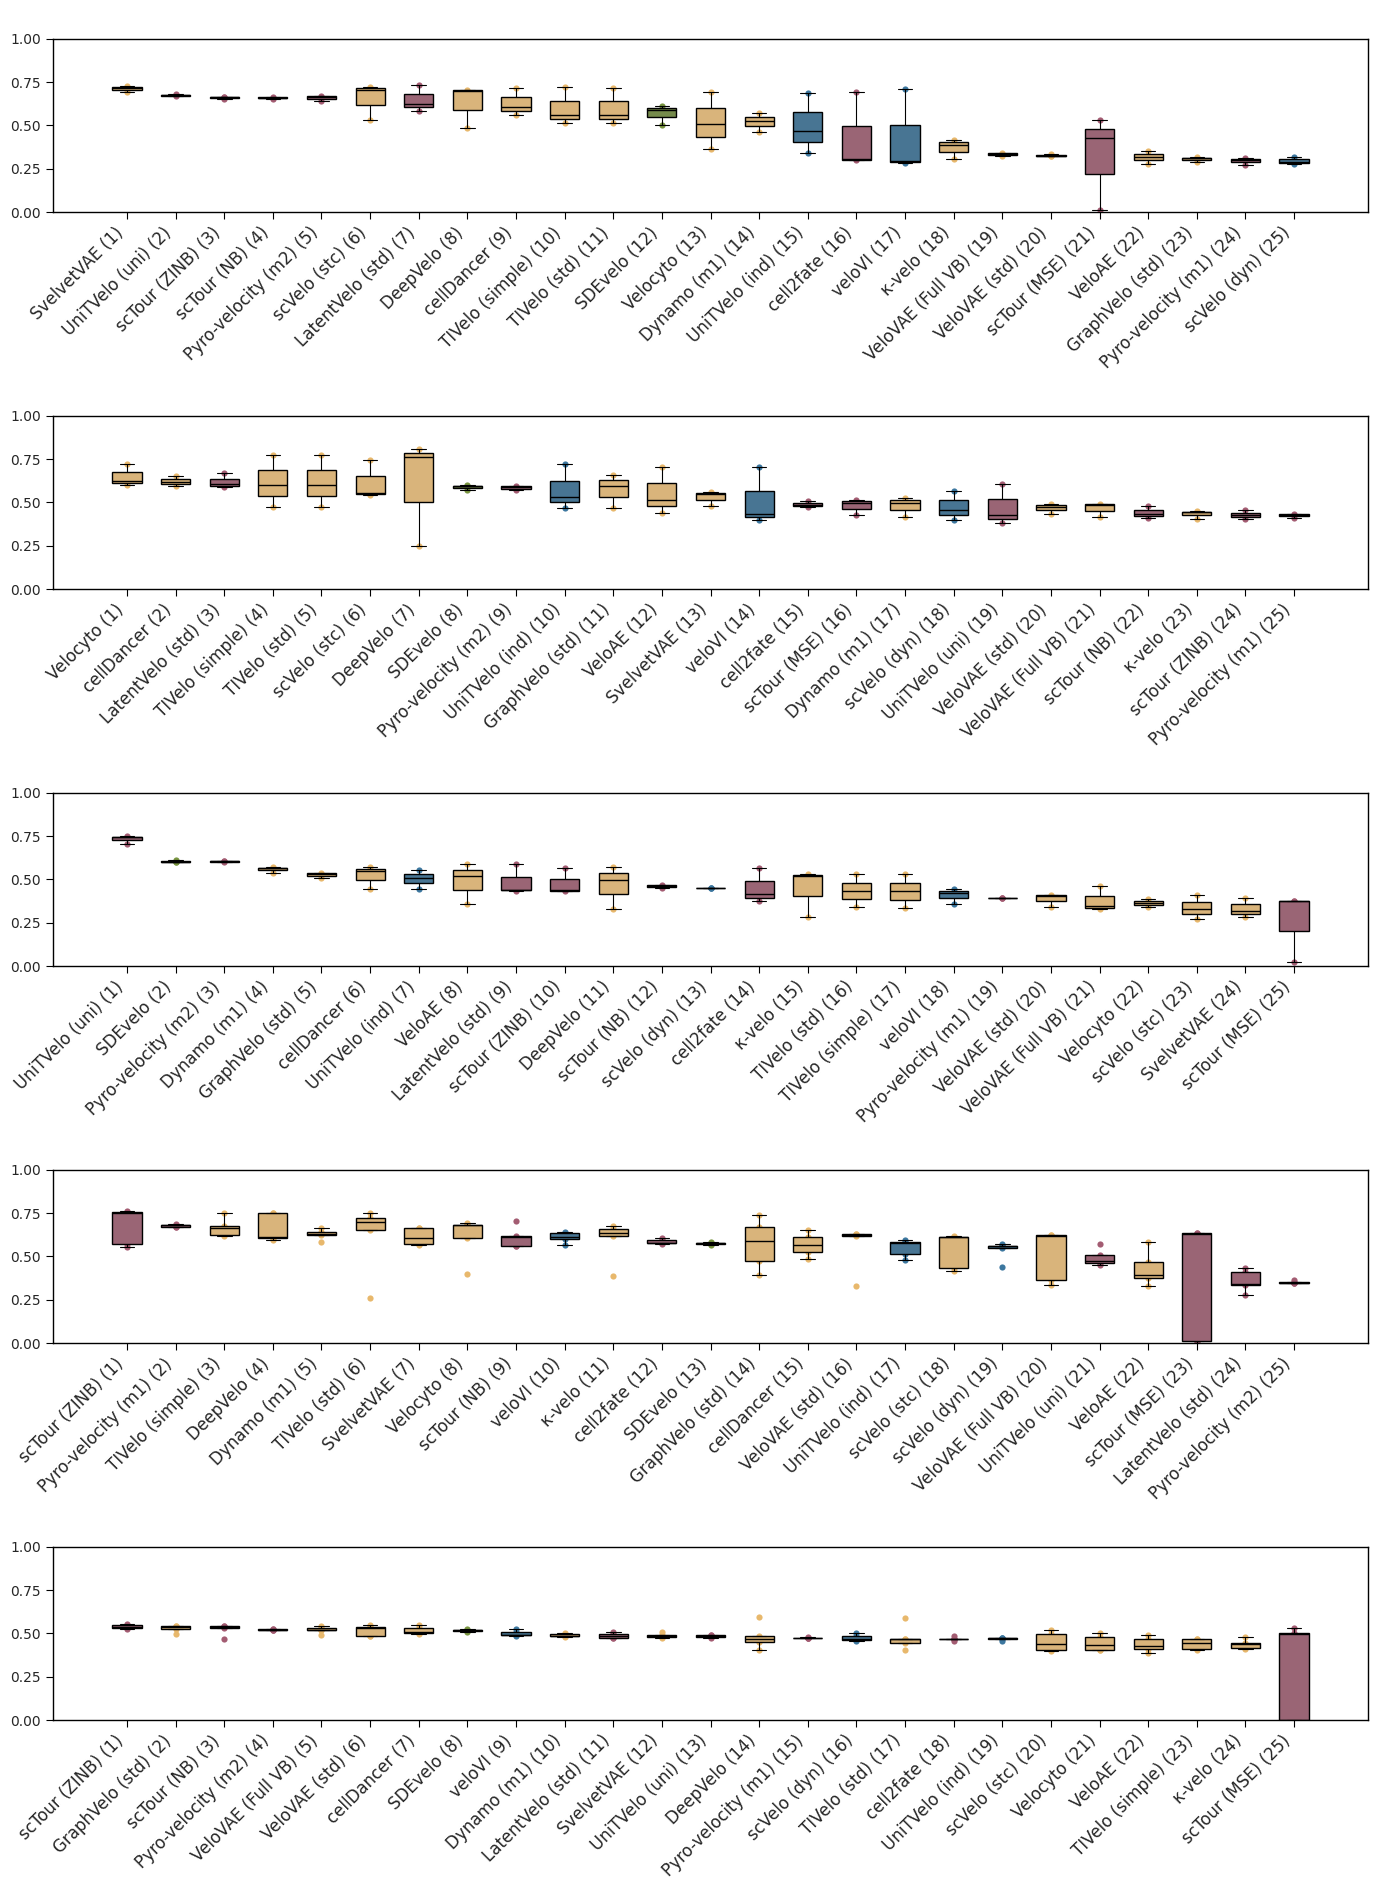

In [5]:
sns.set_style("white")

# Create a 5x1 vertical plot layout (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(14, 19), sharex=False)
# Note: sharex=True would make all subplots share the X-axis (Method)

for index, ax in enumerate(axes):
    df = all_dfs[index].copy()
    dataset = dataset_names[index]

    # -------------------------------
    # 1. Prepare data in melted format
    # -------------------------------
    fold_columns = [col for col in df.columns if col != 'Method']
    melted_df = df.melt(
        id_vars=['Method'],
        value_vars=fold_columns,
        var_name='fold',
        value_name='value'
    )

    # -------------------------------
    # 2. Get method ranking for this dataset
    #    Assuming you have already calculated: method_avg_df_<dataset>
    # -------------------------------
    dataset_avg_col = f"{dataset}_avg"
    dataset_rank_col = f"{dataset}_rank"

    # Extract ranking for this dataset
    dataset_rank_df = final_df[['Method', dataset_avg_col, dataset_rank_col]].copy()
    dataset_rank_df = dataset_rank_df.sort_values(dataset_rank_col, ascending=True)

    # Method order (Rank 1 is best, placed on the far left)
    method_order = dataset_rank_df['Method'].tolist()

    # Apply Method order to the plotting data
    melted_df['Method'] = pd.Categorical(
        melted_df['Method'], 
        categories=method_order, 
        ordered=True
    )
    melted_df = melted_df.sort_values('Method')

    # Use mapped method names
    melted_df['Method_mapped'] = melted_df['Method'].map(newmethods)
    method_order_mapped = [newmethods[m] for m in method_order]
    
    rank_map = dataset_rank_df.set_index("Method")[f"{dataset}_rank"].to_dict()
    method_order_with_rank = [
        f"{newmethods[m]} ({rank_map[m]})" for m in method_order
    ]

    # Colors
    # box_fill_colors = [boxin_colors[m] for m in method_order]
    box_edge_colors = [boxout_colors[m] for m in method_order]

    # -------------------------------
    # 3. Plot boxplot (X-axis=Method -> x='Method_mapped')
    # -------------------------------
    sns.boxplot(
        data=melted_df,
        x='Method_mapped',
        y='value',
        order=method_order_mapped,
        palette=box_edge_colors,
        width=0.6,
        boxprops=dict(edgecolor='black', linewidth=1),
        whiskerprops=dict(color='black', linewidth=0.8),
        capprops=dict(color='black', linewidth=0.8),
        medianprops=dict(color='black', linewidth=1),
        showfliers=False,
        ax=ax
    )

    # -------------------------------
    # 4. Add scatter points (aligned with each method's position)
    # -------------------------------
    for i, method in enumerate(method_order_mapped):
        method_data = melted_df[melted_df['Method_mapped'] == method]

        ax.scatter(
            [i] * len(method_data),
            method_data['value'],
            color=box_edge_colors[i],
            s=20,
            alpha=1.0,
            edgecolors='black',
            linewidth=0,
            zorder=0
        )

    ax.set_ylim(0, 1)
    ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
    
    # -------------------------------
    # 5. Style adjustments
    # -------------------------------
    ax.tick_params(
        axis='x',
        direction='out',
        length=5,
        color='black',
        labelsize=10,
        bottom=True, top=False
    )

    ax.tick_params(
        axis='y',
        direction='out',
        length=5,
        color='black',
        left=True, right=False
    )

    # ✅ Explicitly enable tick lines
    ax.xaxis.set_tick_params(which='both', bottom=True)
    ax.yaxis.set_tick_params(which='both', left=True)

    ax.set_ylim(0, 1)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('  ', fontsize=14, pad=10)
    
    # Rotate method names
    ax.set_xticklabels(method_order_with_rank, rotation=45, ha='right', fontsize=12)

    # Axis spines (borders)
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)

plt.tight_layout()

plt.savefig(f"data_individual_{metric}.svg", format='svg', dpi=300, bbox_inches="tight")
plt.show()